# Multi Layer Perceptron Projet

## Importing the libraries

In [323]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Importing the dataset

In [324]:
data = pd.read_csv('./data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing the dataset

### Cleaning the data

In [325]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [326]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [327]:
data.shape

(569, 33)

In [328]:
data.dropna(axis=1, inplace=True)

In [329]:
data.shape

(569, 32)

### Encoding categorical data

In [330]:
data.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)

### Splitting the dataset into the Training set and Test set

In [331]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [332]:
train_data.shape, test_data.shape

((455, 32), (114, 32))

### Plotting the histogram of the training data

In [333]:
train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)

**TODO**

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

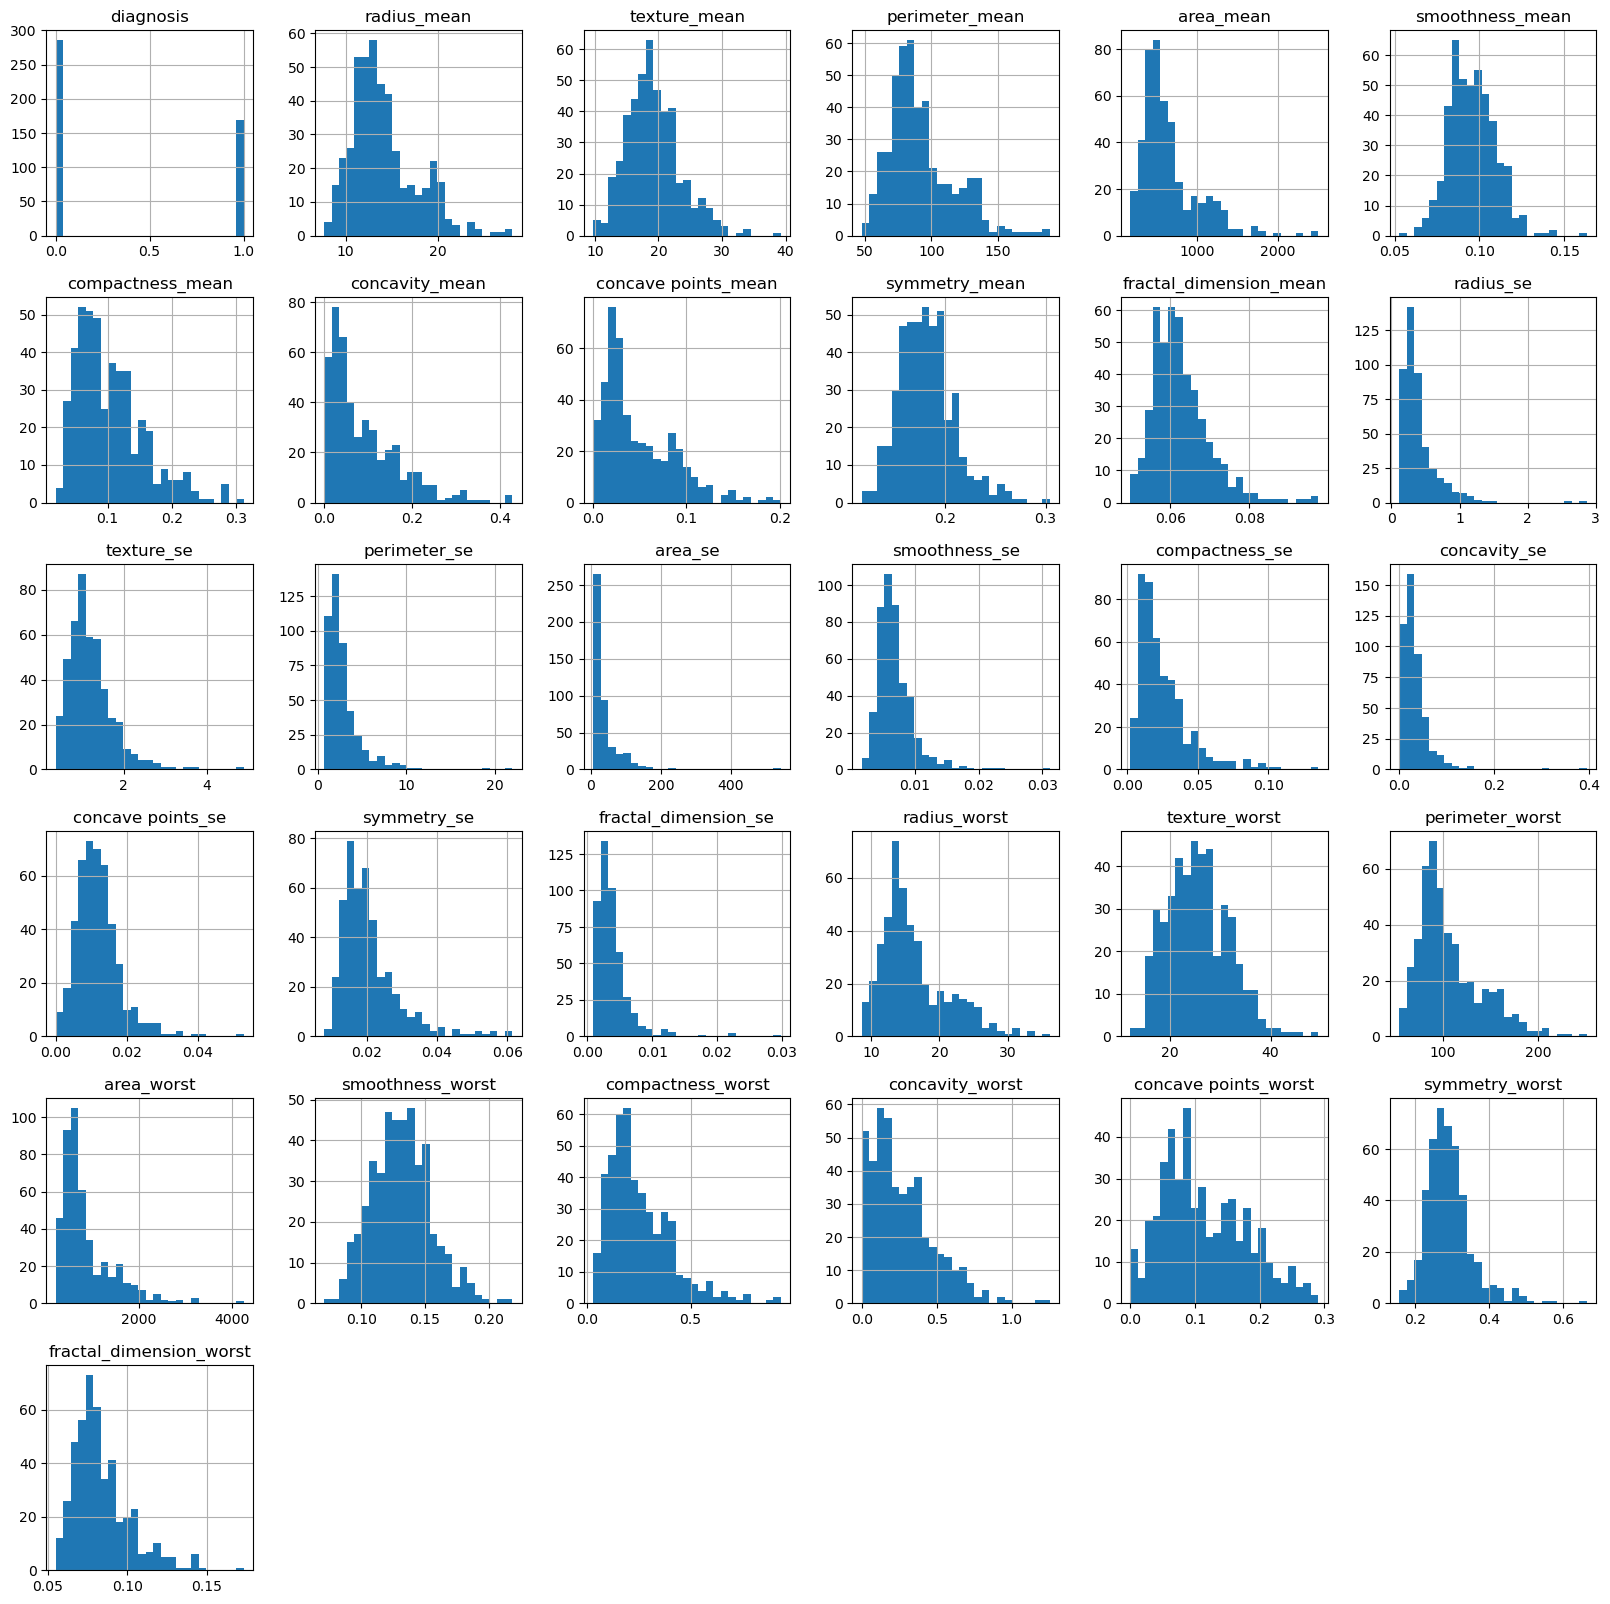

In [334]:
train_data.hist(bins=25, figsize=(20, 20))

**TODO**

### Calculating the correlation matrix

<Figure size 800x800 with 0 Axes>

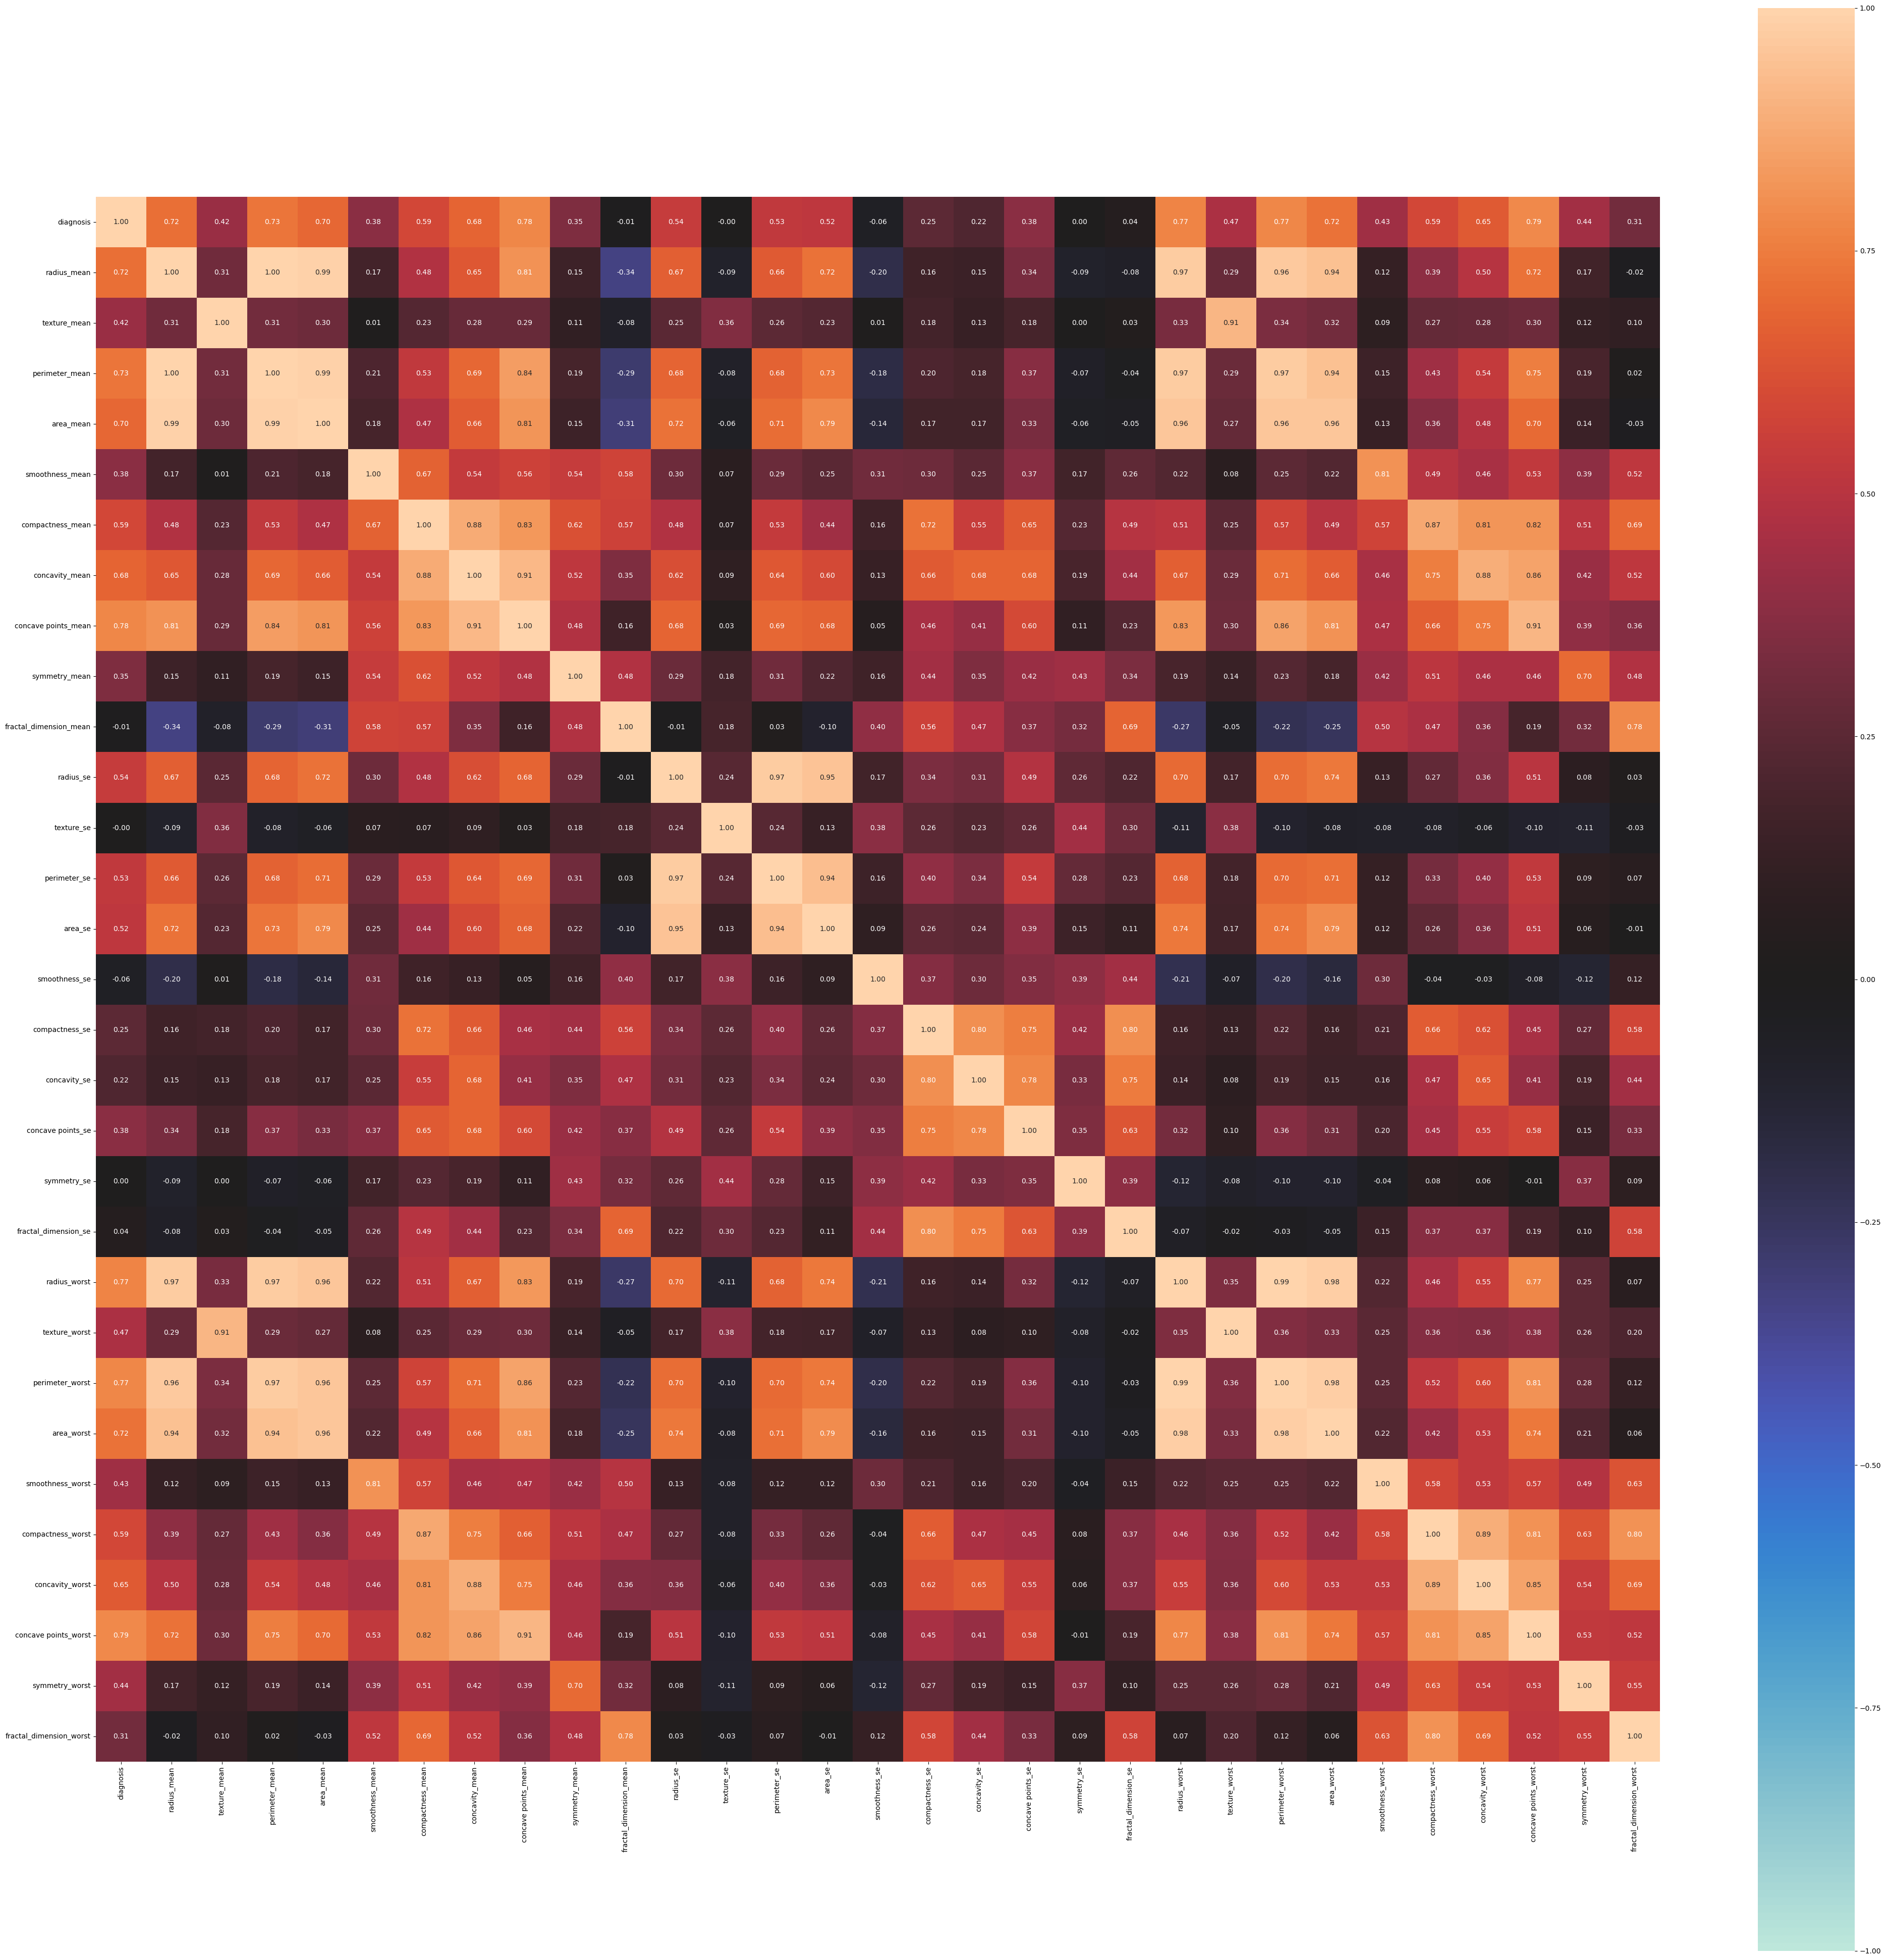

In [335]:
plt.figure(figsize=(8, 8))
corr_mat_complete = associations(
    train_data,
    filename='./images/complete_correlation.png',
    figsize=(50, 50))


In [336]:
corr_mat = train_data.corr()
corr_mat_abs = corr_mat.abs()

In [337]:
# Sort the correlation matrix in descending order
sorted_corr_mat = corr_mat_abs.sort_values(by=['diagnosis'], ascending=False)
abs(sorted_corr_mat['diagnosis'])

diagnosis                  1.000000
concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
smoothness_se              0.058123
fractal_dimension_se       0

**TODO**

In [338]:
mask = corr_mat_abs['diagnosis'] <= 0.1
less_corr_feat = corr_mat_abs[mask]['diagnosis'].index
less_corr_feat

Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

### Seperating the features and the labels

In [339]:
X_train = train_data.drop(['diagnosis'], axis=1)
X_test = test_data.drop(['diagnosis'], axis=1)

y_train = train_data['diagnosis']
y_test = test_data['diagnosis']

### Feature extraction using random forest

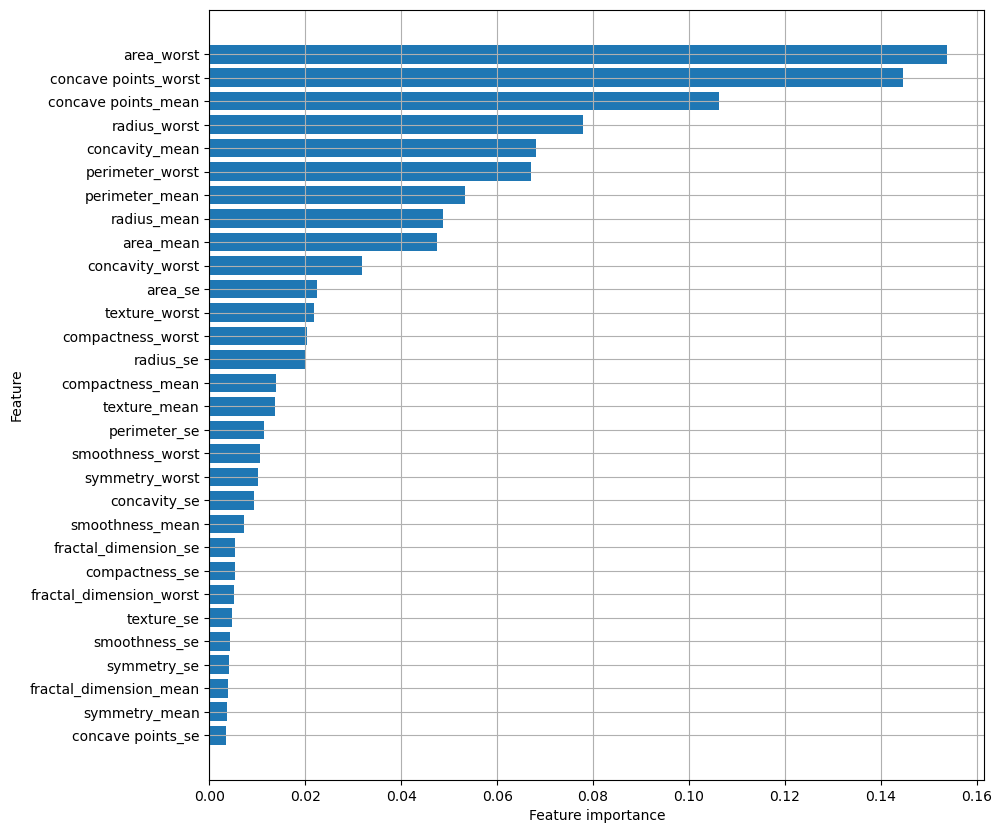

In [340]:
rnd_frst_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_frst_clf.fit(X_train, y_train)

feat_ind = list(zip(X_train.columns,
                    rnd_frst_clf.feature_importances_))
feat_ind.sort(key=lambda x: x[1])
fig = plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in feat_ind], [x[1] for x in feat_ind])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


**TODO**

In [341]:
X_train.drop(less_corr_feat, axis=1, inplace=True)
X_test.drop(less_corr_feat, axis=1, inplace=True)

### Potting the scatter plot of the features

In [342]:
X_train.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
radius_se                  float64
perimeter_se               float64
area_se                    float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

### Normalizing the data

First, we use standard scaler to detect the outliers.

In [346]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

### Plotting the box plot of the features

<Axes: >

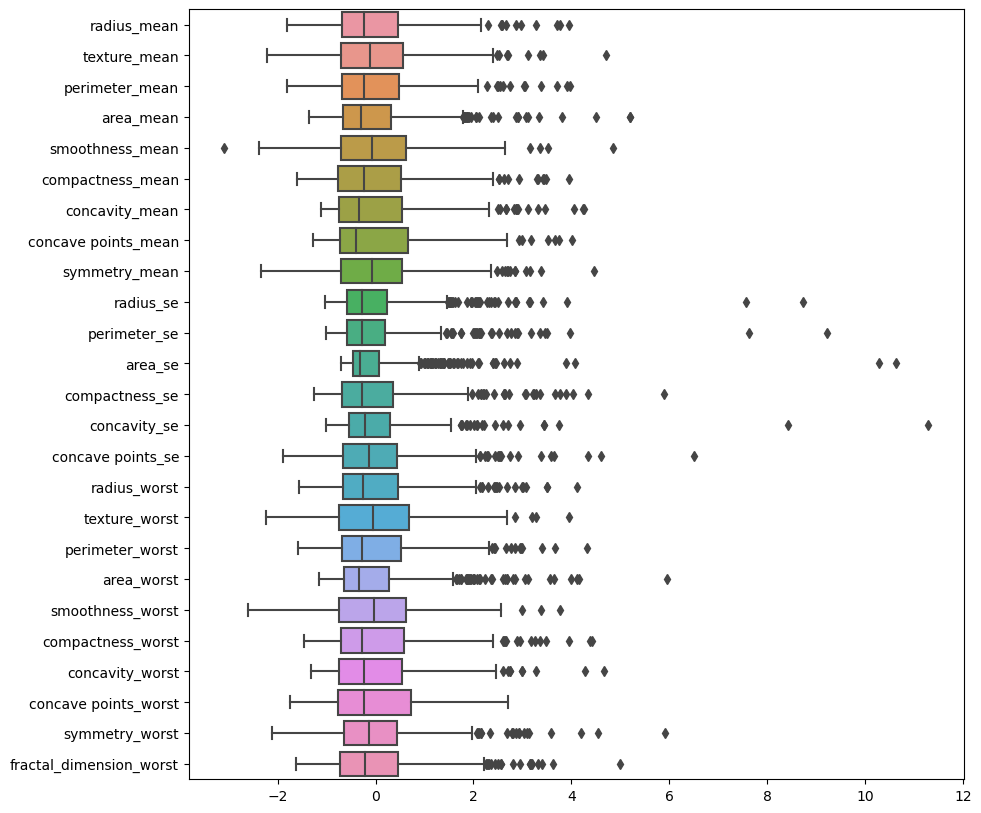

In [347]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


In [345]:
X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-8.491376e-17,-3.904081e-18,-4.758099e-18,1.052272e-18,-1.774014e-14,-1.155608e-15,-8.979386e-16,5.934203e-15,5.247085e-15,2.967102e-16,...,-1.854438e-17,-1.110223e-16,-4.270089e-19,3.126315e-19,4.997224e-16,-1.456222e-15,-3.591754e-16,-1.061910e-15,8.120488e-15,4.997224e-16
std,2.828202e-01,2.344114e-01,4.111499e-02,2.817352e-03,7.182357e+01,1.905833e+01,1.258370e+01,2.627416e+01,3.638043e+01,3.531561e+00,...,2.078455e-01,1.648775e-01,2.996285e-02,1.761578e-03,4.332285e+01,6.451018e+00,4.775593e+00,1.530782e+01,1.583500e+01,5.602900e+01
min,-5.140490e-01,-5.206407e-01,-7.431565e-02,-3.841559e-03,-2.224091e+02,-3.059740e+01,-1.407698e+01,-3.332913e+01,-8.523394e+01,-3.623291e+00,...,-3.264648e-01,-3.674186e-01,-4.723460e-02,-2.027563e-03,-1.132919e+02,-9.382320e+00,-6.262482e+00,-2.675625e+01,-3.360070e+01,-9.049779e+01
25%,-1.929801e-01,-1.656721e-01,-2.836942e-02,-1.857985e-03,-5.116851e+01,-1.479370e+01,-9.434169e+00,-1.928778e+01,-2.547631e+01,-2.085503e+00,...,-1.373796e-01,-1.220777e-01,-2.051241e-02,-1.118803e-03,-3.215478e+01,-4.485825e+00,-3.604409e+00,-1.177557e+01,-1.028119e+01,-4.023841e+01
50%,-6.540040e-02,-2.775090e-02,-9.977402e-03,-8.150006e-04,-5.798408e+00,-4.594484e+00,-4.332149e+00,-1.026514e+01,-2.512972e+00,-9.767490e-01,...,-5.465212e-02,-8.581968e-03,-8.468794e-03,-5.908009e-04,-1.186429e+00,-1.774566e+00,-1.099139e+00,-3.649029e+00,-1.956380e+00,-1.195378e+01
75%,1.297685e-01,1.318751e-01,2.006177e-02,8.987000e-04,4.542674e+01,1.005417e+01,6.880580e+00,1.768294e+01,1.945772e+01,8.198316e-01,...,9.395495e-02,1.129332e-01,1.575310e-02,4.794780e-04,2.724815e+01,3.697891e+00,2.568112e+00,1.099421e+01,6.832314e+00,2.574860e+01
max,1.119211e+00,1.104192e+00,1.633268e-01,1.465752e-02,3.490118e+02,7.547008e+01,5.350659e+01,1.055656e+02,1.626643e+02,3.081793e+01,...,8.555662e-01,6.525474e-01,1.293662e-01,1.047940e-02,1.630397e+02,2.851330e+01,2.229099e+01,4.143360e+01,9.360344e+01,2.798080e+02


According to the box plots and the maximum, mean and 75% we should delete outliers.

### Deleting the outliers

In [355]:
outliers = abs(X_train_scaled) > 3
outliers = outliers.sum(axis=1)
outliers = outliers[outliers > 0]

X_train_scaled.drop(outliers.index, inplace=True)
y_train.drop(outliers.index, inplace=True)

X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


### Plotting the box plot of the features after deleting the outliers

<Axes: >

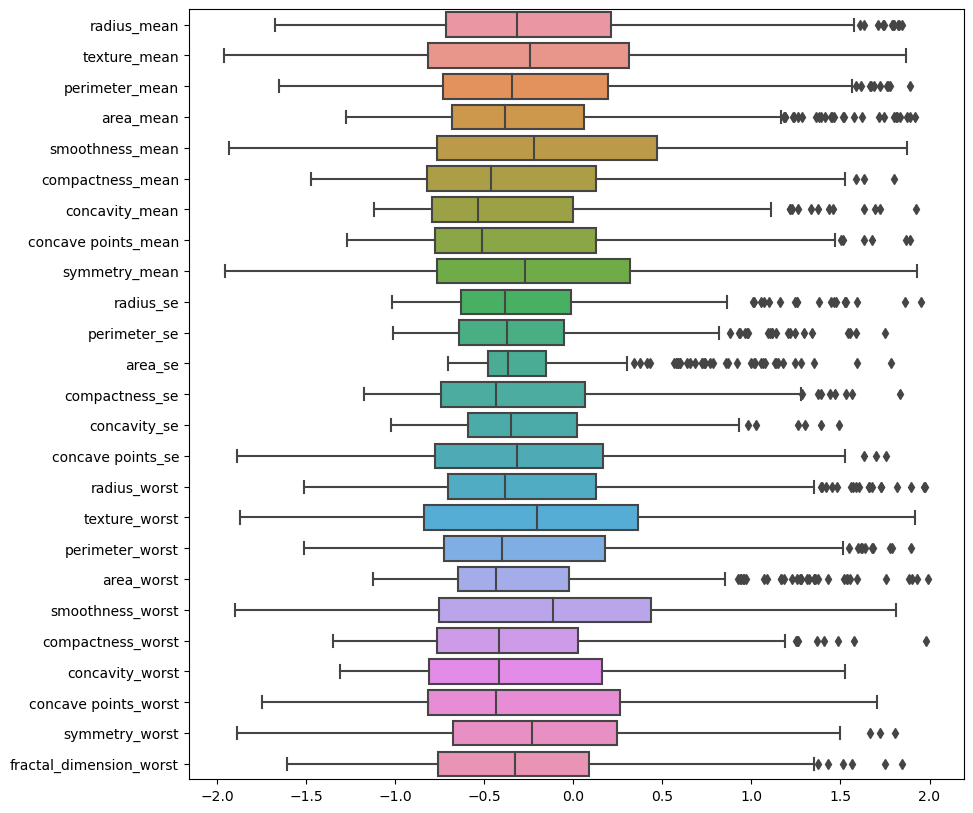

In [356]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=X_train_scaled, orient='h')


In [352]:
X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,450.000000,450.000000,448.000000,447.000000,450.000000,448.000000,448.000000,449.000000,450.000000,448.000000,...,448.000000,451.000000,451.000000,446.000000,452.000000,447.000000,450.000000,454.000000,447.000000,446.000000
mean,-0.028692,-0.035284,-0.042964,-0.060223,-0.026225,-0.044153,-0.047591,-0.037557,-0.029493,-0.066679,...,-0.042001,-0.024877,-0.022060,-0.068448,-0.011843,-0.055511,-0.030916,0.003850,-0.061412,-0.061152
std,0.939204,0.940158,0.916115,0.861946,0.928196,0.920262,0.905551,0.927762,0.946307,0.779571,...,0.924559,0.962083,0.952266,0.848193,0.970785,0.889239,0.934398,0.997722,0.870051,0.887918
min,-1.817582,-2.221056,-1.790239,-1.363535,-2.386986,-1.605461,-1.118668,-1.268513,-2.342852,-1.025974,...,-1.570710,-2.228434,-1.576439,-1.150992,-2.615060,-1.454394,-1.311352,-1.747881,-2.121925,-1.615195
25%,-0.683049,-0.708516,-0.693188,-0.660183,-0.712599,-0.777853,-0.752513,-0.734885,-0.701185,-0.594329,...,-0.662009,-0.747009,-0.684595,-0.635863,-0.742213,-0.703431,-0.755115,-0.764392,-0.665897,-0.726856
50%,-0.238314,-0.134794,-0.247399,-0.307592,-0.080731,-0.262230,-0.363457,-0.406983,-0.083627,-0.293705,...,-0.275417,-0.055348,-0.282943,-0.343485,-0.038216,-0.296371,-0.234694,-0.234626,-0.137799,-0.223995
75%,0.432677,0.551445,0.449911,0.258273,0.621703,0.512777,0.512809,0.581451,0.525745,0.192149,...,0.389169,0.644557,0.500286,0.203617,0.626789,0.535810,0.528684,0.719740,0.403758,0.419778
max,2.973109,2.703928,2.755435,2.906444,2.647128,2.934614,2.909375,2.987901,2.859550,2.871103,...,2.844344,2.844847,2.987202,2.857302,2.992217,2.943330,2.995755,2.706695,2.938942,2.943324


In [353]:
X_train_scaled.shape, y_train.shape

((454, 25), (454,))

### Normalizing the data with min-max scaler

We use min-max scaler to use the relu activation function.

In [357]:
X_train_scaled_min = X_train_scaled.min()
X_train_scaled_max = X_train_scaled.max()

X_train_scaled = (X_train_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)
X_test_scaled = (X_test_scaled - X_train_scaled_min) / \
    (X_train_scaled_max - X_train_scaled_min)
